**Dataset columns**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/rouat/Desktop/MMcows/Datasets/sensor_data/sensor_data/behavior_labels/individual/C01_0725.csv")
print (df.columns)

Index(['timestamp', 'datetime', 'behavior'], dtype='object')


**Display first rows**

In [4]:
print(df.head())

    timestamp datetime  behavior
0  1690261200  0:00:00         0
1  1690261201  0:00:01         0
2  1690261202  0:00:02         0
3  1690261203  0:00:03         0
4  1690261204  0:00:04         0


**Dataset shape**

In [7]:
print(df.shape)

(86400, 3)


**Unique counts by column**

In [10]:
print (df.nunique())

timestamp    86400
datetime     86400
behavior         7
dtype: int64


**Columns types**

In [13]:
print (df.dtypes)

timestamp     int64
datetime     object
behavior      int64
dtype: object


**Check for missing values**

In [16]:
print(df.isnull().sum())

timestamp    0
datetime     0
behavior     0
dtype: int64


**Unique values in behavior column**

In [19]:
print ( "Unique values in the 'behavior' column:")
print(df['behavior'].unique())


Unique values in the 'behavior' column:
[0 4 3 1 2 6 7]


**Meaning of each behavior**
 0 - unknown
 1 - Walking
 2 - Standing
 3 - Feeding head up
 4 - Feeding head down
 5 - Licking
 6 - Drinking
 7 - Lying


**Frequency and percentage of behavior categories**

In [23]:
# Count the number of occurrences of each unique value
counts = df['behavior'].value_counts()

# Calculate the percentage of each unique value
percentages = df['behavior'].value_counts(normalize=True) * 100

# Display the counts
print("\nNumber of occurrences:")
print(counts)

# Display the percentages
print("\nPercentage of each value:")
print(percentages)


Number of occurrences:
behavior
7    44679
2    15237
0    15028
4     6367
3     3094
1     1012
6      983
Name: count, dtype: int64

Percentage of each value:
behavior
7    51.711806
2    17.635417
0    17.393519
4     7.369213
3     3.581019
1     1.171296
6     1.137731
Name: proportion, dtype: float64


**Bar plot of behavior percentages**

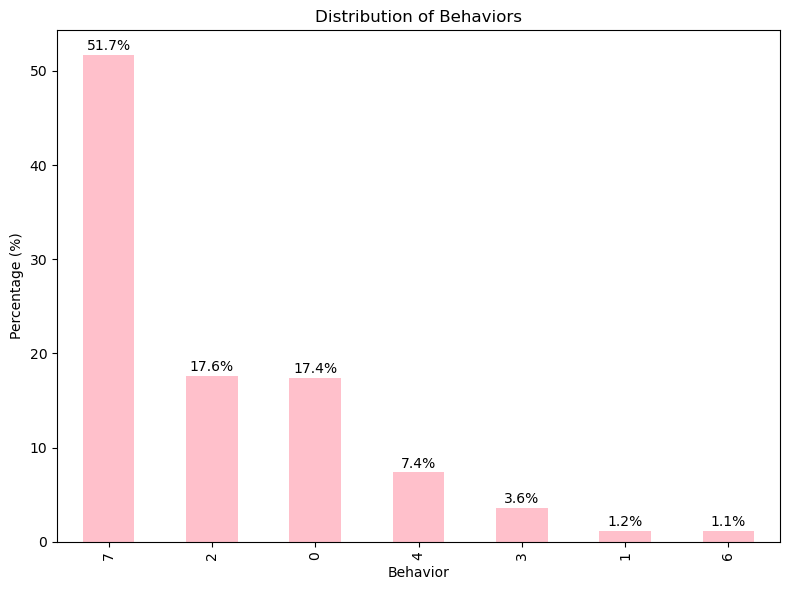

In [20]:
plt.figure(figsize=(8,6))
percentages.plot(kind='bar',color='pink')

plt.xlabel('Behavior')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Behaviors')

for idx, value in enumerate(percentages):
    plt.text(idx, value + 0.5, f"{value:.1f}%", ha='center')

plt.tight_layout()  
plt.show()

**Number of duplicates**

In [26]:
print ("Number of duplicates :",df.duplicated().sum())


Number of duplicates : 0


**Show timestamp and datetime range**

In [ ]:

print("Timestamp range:", df['timestamp'].min(), "to", df['timestamp'].max())
df['datetime_readable'] = pd.to_datetime(df['timestamp'], unit='s')

print( df['datetime_readable'].min(), "to", df['datetime_readable'].max())

Timestamp range: 1690261200 to 1690347599
2023-07-25 05:00:00 to 2023-07-26 04:59:59


In [50]:
df['datetime_converted'] = pd.to_timedelta(df['datetime'])

min_time = str(df['datetime_converted'].min()).split()[-1]
max_time = str(df['datetime_converted'].max()).split()[-1]

print("Datetime range from", min_time, "to", max_time)


Datetime range from 00:00:00 to 23:59:59


In [ ]:
df['datetime_readable'] = pd.to_datetime(df['timestamp'], unit='s')

print(df.head())

    timestamp datetime  behavior   datetime_readable
0  1690261200  0:00:00         0 2023-07-25 05:00:00
1  1690261201  0:00:01         0 2023-07-25 05:00:01
2  1690261202  0:00:02         0 2023-07-25 05:00:02
3  1690261203  0:00:03         0 2023-07-25 05:00:03
4  1690261204  0:00:04         0 2023-07-25 05:00:04


**Detect gaps in timestamps**

In [ ]:
df['datetime_readable'] = pd.to_datetime(df['timestamp'], unit='s')

df['time_diff_next'] = df['timestamp'].shift(-1) - df['timestamp']

# Find where the difference is > 1
gaps = df[df['time_diff_next'] > 1]

if not gaps.empty:
    print("Found gaps between these rows:\n")
    for idx, row in gaps.iterrows():
        next_idx = idx + 1
        if next_idx in df.index:
            print(f"- Gap of {int(row['time_diff_next'])} seconds")
            print(f"  Current row: timestamp {row['timestamp']} ({row['datetime_readable']})")
            print(f"  Next row:    timestamp {df.loc[next_idx, 'timestamp']} ({df.loc[next_idx, 'datetime_readable']})\n")
else:
    print("No gaps found, all timestamps are continuous.")

No gaps found, all timestamps are continuous.
